In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q. No.2

### a) Train separate perceptrons for each gate

In [36]:
def create_dataset(data_type="AND"):
    """
    create data.
    data_type="AND" or "OR" or "XOR"

    return x and y 
    """
    x=np.array([[0,0],[0,1],[1,0],[1,1]]) # all the condition of 0 and 1 has included
    if data_type=='AND':
        y=np.array([0,0,0,1])
    elif data_type=='OR':
        y=np.array([0,1,1,1])
    else:
        y=np.array([0,1,1,0])
    
    return x,y

class single_layer_model:
    def __init__(self, input_size, lr=0.1, num_epoch=5):
        """
        initialize the parameter
        w is the wight
        b is the bias
        lr: learning rate
        num_epoch: number of training epoch
        """
        self.w = np.zeros(input_size)  
        self.b=0
        self.lr = lr    
        self.num_epoch = num_epoch

    def activate(self, x):
        """
        the activation function
        """
        if x>=0:
            return 1
        else:
            return 0

    def predict(self, x):
        """
        return the value of the prediction
        """
        val = np.dot(self.w,x)+self.b
        val=self.activate(val)

        return val

    def fit(self, X, Y):
        """
        train the model to fit the data
        """
        
        for i in range(self.num_epoch):
            error_all=0
            for j in range(len(X)):
                x,y=X[j],Y[j]
                y_pred = self.predict(x)
                error = y - y_pred
                error_all+=np.abs(error)
                # update the model
                self.w += self.lr * error * x       
                self.b += self.lr * error   
            print(f'Epoch: {i}, error: {error_all}')

    def test(self,X,Y):
        correct=0
        for i in range(len(X)):
            x,y=X[i],Y[i]
            y_pred=self.predict(x)
            correct+= (y==y_pred)
        return correct/len(X)*100



# start traing
# as there are just four conditions of 0 and 1. I directly use the training data to test the accuracy.
# AND model
model_and=single_layer_model(input_size=2)
X_and,Y_and=create_dataset("AND")
model_and.fit(X_and,Y_and)
print(f'accuracy of AND model : {model_and.test(X_and,Y_and)} %')



#OR model
model_or=single_layer_model(input_size=2)
X_or,Y_or=create_dataset("OR")
model_or.fit(X_or,Y_or)
print(f'accuracy of OR model : {model_or.test(X_or,Y_or)} %')


#XOR model
model_xor=single_layer_model(input_size=2)
X_xor,Y_xor=create_dataset("XOR")
model_xor.fit(X_xor,Y_xor)
print(f'accuracy of XOR model : {model_xor.test(X_xor,Y_xor)} %')




Epoch: 0, error: 2
Epoch: 1, error: 3
Epoch: 2, error: 3
Epoch: 3, error: 0
Epoch: 4, error: 0
accuracy of AND model : 100.0 %
Epoch: 0, error: 2
Epoch: 1, error: 2
Epoch: 2, error: 1
Epoch: 3, error: 0
Epoch: 4, error: 0
accuracy of OR model : 100.0 %
Epoch: 0, error: 3
Epoch: 1, error: 3
Epoch: 2, error: 4
Epoch: 3, error: 4
Epoch: 4, error: 4
accuracy of XOR model : 50.0 %


### b) Plot the decision boundary for AND and OR cases

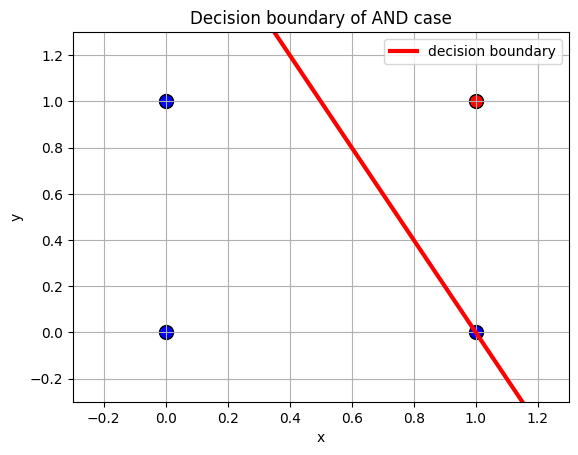

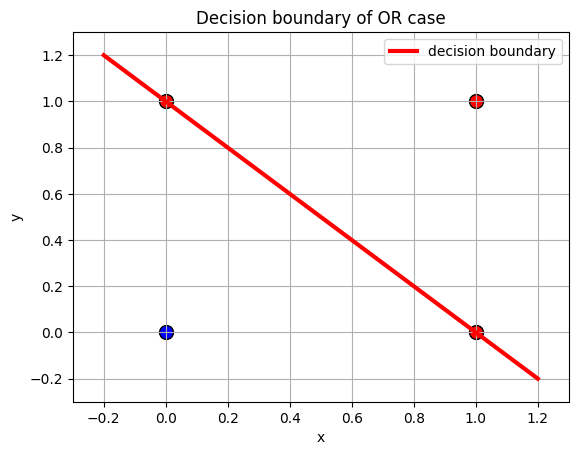

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, Y, title):
    """
    plot the decision boundary givem model and data.
    """
    x = np.linspace(-0.2, 1.2, 100)  # range of x
    if model.w[1] != 0:
        y = -(model.w[0] * x + model.b) / model.w[1]

    plt.figure()
    for xx, y_true in zip(X, Y):
        plt.scatter(xx[0], xx[1], c='r' if y_true == 1 else 'b', edgecolors='k', s=100)
    plt.plot(x, y, label='decision boundary', color='red', linewidth=3)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-0.3, 1.3)
    plt.ylim(-0.3, 1.3)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_decision_boundary(model_and,X_and,Y_and,'Decision boundary of AND case')
plot_decision_boundary(model_or,X_or,Y_or,'Decision boundary of OR case')

### c) Explain why XOR fails

The reason why XOR fails is that single-layer perceptron can only learn linearly separable function. The rule of XOR is not linearly separable. But for AND and OR we can use a straight line in 2-d space to separate the 4 points(4 conditions) shown on the figure above.

## Q.No.3

### a) Plot all functions and their derivatives (-5 to 5 x-range)

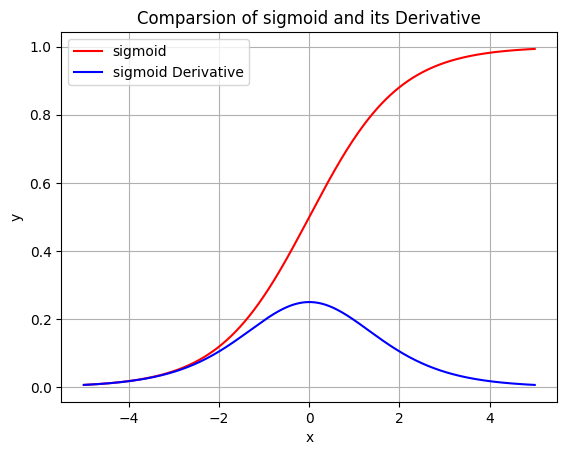

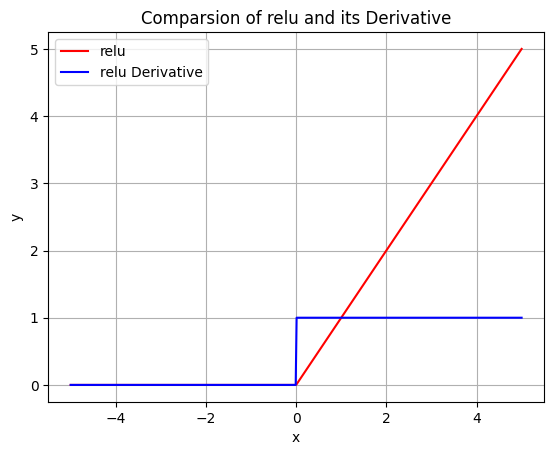

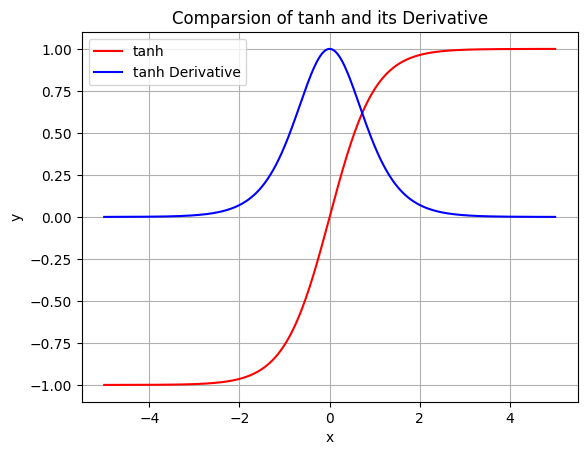

In [40]:
"""
activation functions and their derivatives
"""
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_de(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    exp_pos = np.exp(x)
    exp_neg = np.exp(-x)
    return (exp_pos - exp_neg) / (exp_pos + exp_neg)

def tanh_de(x):
    return 1 - tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_de(x):
    return np.where(x > 0, 1, 0)

def plot_fun(act_func,de_func,rang_l=-5,range_r=5, num_points=500,title="activate function"):
    x = np.linspace(rang_l, range_r, num_points)
    plt.figure()
    plt.plot(x, act_func(x), label=f'{title}',color='red')
    plt.plot(x, de_func(x), label=f'{title} Derivative',color='blue')

    plt.title(f'Comparsion of {title} and its Derivative')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.grid(True)
    plt.legend()
    plt.show()

plot_fun(sigmoid,sigmoid_de,title="sigmoid")
plot_fun(relu,relu_de,title="relu")
plot_fun(tanh,tanh_de,title="tanh")






### b) Create a wrapper function that returns both activation and derivative based on user input

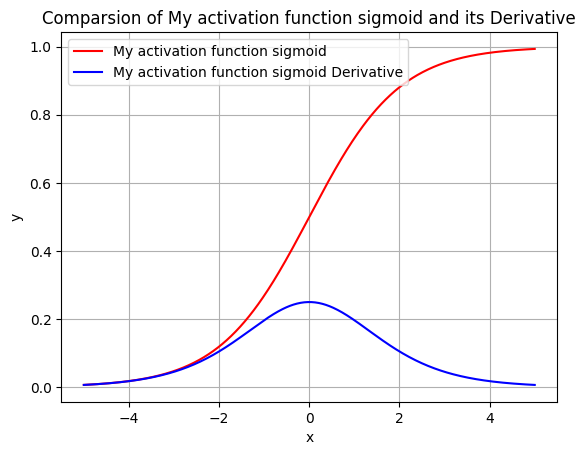

In [ ]:
def get_func(func_name):
    """
    input: the name of the function
    output: both activation and derivative
    """
    if func_name == "sigmoid":
        return sigmoid, sigmoid_de
    elif func_name == "tanh":
        return tanh, tanh_de
    elif func_name == "relu":
        return relu, relu_de
    else:
        raise ValueError("No such function. please select between: sigmoid, tanh, relu.")

# test the function get_func
my_func,my_func_de=get_func('sigmoid')
plot_fun(my_func,my_func_de,title="My activation function sigmoid")

## Q. No. 4

### Implement forward propagation for a 3-layer neural network (input=4, hidden=6, output=1) with:
### a) Configurable activation functions
### b) Random weight initialization (properly scaled)
### c) Output calculation for sample input

In [57]:
class My_NN:
    def __init__(self, input_size=4, hidden_size=6, output_size=1, 
                 hidden_activation_func_name="sigmoid", output_activation_func_name="relu", initial_method="he",seed=None):
        """
        forward propagation of a 3 layer neural network
        hidden_activation_func_name, output_activation_func_name : name of selected activation function
        initial_method: method to weight initialization
        seed: random seed
        """
        if seed is not None: # random seed chose when initialize the parameter
            np.random.seed(seed)

        # initialize the parameter

        self.w0,self.b0 = self.para_initial(hidden_size,input_size,initial_method)

        self.w1,self.b1 = self.para_initial(output_size,hidden_size,initial_method)

        hidden_func,_=get_func(hidden_activation_func_name)
        output_func,_=get_func(output_activation_func_name)

        self.hidden_activation = hidden_func
        self.output_activation = output_func
    
    def para_initial(self,output_size,input_size,method):

        """
        chose the method to initialize the parameter in proper scale:
        selectable: 'xavier', 'he', 'random'

        """
        if method == "xavier":
            scale = np.sqrt(1.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "he":
            scale = np.sqrt(2.0 / input_size)
            w = np.random.randn(output_size, input_size) * scale
        elif method == "random":
            w = np.random.randn(output_size, input_size)
        else:
            raise ValueError("Unsupported method. please chose from: 'xavier', 'he', 'random'")
        
        # bias initialize to 0
        b = np.zeros((output_size, 1))  

        return w, b

    def forward(self, x):
        """
        forward process
        x:(input_size, 1)
        """
        output1 = np.dot(self.w0,x) + self.b0
        output2 = self.hidden_activation(output1)

        output3 = np.dot(self.w1,output2) + self.b1
        result = self.output_activation(output3)

        return result
    
x = np.random.rand(4, 1)
model = My_NN(hidden_activation_func_name="tanh", output_activation_func_name="sigmoid", initial_method="he",seed=12)
forward_output=model.forward(x)

print(f'Result after forward propagation: {forward_output}')

Result after forward propagation: [[0.23124656]]
